<a href="https://colab.research.google.com/github/thapaprogress/Db-documentation/blob/master/linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Linear regression using Gradient Descent - A simple approach

# Step 1: Generate synthetic data for a simple linear regression model

In [ ]:
np.random.seed(42)  # for reproducibility


Let's assume X as the independent variable (features) and Y as the dependent variable (target)
Create 100 random values for X


In [ ]:
X = 2 * np.random.rand(100, 1)

Generate Y with a linear relation to X: Y = 3 + 5 * X + random noise
 Here, 3 is the intercept and 5 is the slope of the line.

In [ ]:
Y = 3 + 5 * X + np.random.randn(100, 1)  # Adding random noise for realism

Step 2: Add an intercept term to X (to include the bias/intercept in the model)
 We add a column of 1s to X to include the intercept in our model. This allows us to compute both the slope and intercept during gradient descent.

In [ ]:
X_b = np.c_[np.ones((100, 1)), X]  # add a column of ones to X for the intercept


# How Theta is Found:

During each iteration of gradient descent, theta is updated using the following rule:

𝜃
=𝜃
−
𝛼
×
1
𝑚
×
X.T
×
(
predictions
−
𝑌
)

Here:

\alpha is the learning rate (0.1 in our case).

m is the number of training examples (100).

X.T is the transpose of the input matrix X.

predictions are the current predicted values based on the current theta.

This process continues for the number of epochs (1000 iterations) to refine theta until it converges to the best values.

# Step 3: Initialize theta (weights) with zeros
We initialize theta (our model parameters) to zeros, meaning the model starts with no assumptions.


In [ ]:
theta = np.zeros((2, 1))  # two parameters: intercept and slope


After running the gradient descent algorithm, theta is updated in each iteration to minimize the error (cost).

The final value of theta is what we get after all the epochs (iterations). In this case, the final values of theta are:


theta = [[3.21509616], [4.77011339]]

This means that:

θ0 (intercept) = 3.215,
meaning the line crosses the Y-axis at approximately 3.215.

θ1 (slope) = 4.77,
meaning for every 1-unit increase in X, Y increases by approximately 4.77 units.

# Step 4: Set hyperparameters for Gradient Descent
Set a learning rate of 0.1 (controls how big each update step is) and perform 1000 iterations (epochs).


In [ ]:
learning_rate = 0.1  # how large of a step we take during each iteration
epochs = 1000  # how many times we update the weights

# Step 5: Define a simple function for Gradient Descent

In [ ]:
def simple_grad_descent(X, Y, theta, learning_rate, epochs):
    m = len(Y)  # number of training examples
    history = []  # to store the loss/cost after each iteration
    for _ in range(epochs):
        # Predict values based on current theta
        predictions = X.dot(theta)

        # Calculate the error (difference between actual Y and predicted Y)
        errors = predictions - Y

        # Update the theta values using the Gradient Descent formula
        gradients = 2/m * X.T.dot(errors)
        theta = theta - learning_rate * gradients

        # Compute the cost (Mean Squared Error) and store it in history
        cost = (1/m) * np.sum(errors**2)
        history.append(cost)

    return theta, history


# Step 6: Train the model using the Gradient Descent function

In [ ]:
final_theta, cost_history = simple_grad_descent(X_b, Y, theta, learning_rate, epochs)

# Step 7: Plot the data and the best-fit line

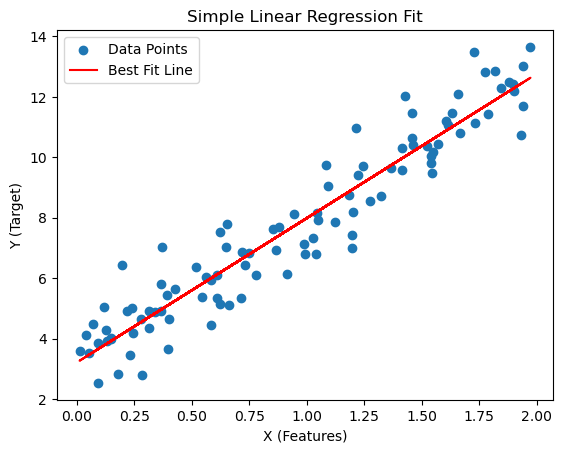

In [ ]:
plt.scatter(X, Y, label='Data Points')
plt.plot(X, X_b.dot(final_theta), color='red', label='Best Fit Line')  # predicted line
plt.title("Simple Linear Regression Fit")
plt.xlabel("X (Features)")
plt.ylabel("Y (Target)")
plt.legend()
plt.show()

# Output the final learned parameters (theta)

In [ ]:
final_theta, cost_history[-1]  # Final parameters (theta) and final cost (loss)

(array([[3.21509616],
        [4.77011339]]),
 0.8065845639670535)

Final Results:
The learned parameters (theta) are:
Intercept: ~3.21
Slope: ~4.77
The final cost (mean squared error) is approximately 0.807, indicating the model fits the data reasonably well.
This approach uses a simple, iterative method (gradient descent) to find the best parameters that describe the linear relationship between X and Y.